In [19]:
from jux.env import JuxEnv, JuxEnvBatch
from jax.tree_util import tree_map, tree_reduce

from jux.config import JuxBufferConfig
from rich import print as rprint

In [2]:
env = JuxEnv(buf_cfg=JuxBufferConfig(MAX_N_UNITS=1000))
state = env.reset(42)

In [16]:
rprint(tree_map(lambda x: x.nbytes, state))

State(
    env_cfg=EnvConfig(
        max_episode_length=4,
        map_size=4,
        verbose=4,
        validate_action_space=1,
        max_transfer_amount=4,
        MIN_FACTORIES=4,
        MAX_FACTORIES=4,
        CYCLE_LENGTH=4,
        DAY_LENGTH=4,
        UNIT_ACTION_QUEUE_SIZE=4,
        MAX_RUBBLE=4,
        FACTORY_RUBBLE_AFTER_DESTRUCTION=4,
        INIT_WATER_METAL_PER_FACTORY=4,
        INIT_POWER_PER_FACTORY=4,
        MIN_LICHEN_TO_SPREAD=4,
        LICHEN_LOST_WITHOUT_WATER=4,
        LICHEN_GAINED_WITH_WATER=4,
        MAX_LICHEN_PER_TILE=4,
        POWER_PER_CONNECTED_LICHEN_TILE=4,
        LICHEN_WATERING_COST_FACTOR=4,
        BIDDING_SYSTEM=1,
        FACTORY_PROCESSING_RATE_WATER=4,
        ICE_WATER_RATIO=4,
        FACTORY_PROCESSING_RATE_METAL=4,
        ORE_METAL_RATIO=4,
        FACTORY_CHARGE=4,
        FACTORY_WATER_CONSUMPTION=4,
        POWER_LOSS_FACTOR=4,
        ROBOTS=(
            UnitConfig(
                METAL_COST=4,
                POWER_COST=4,
                CARGO_SPACE=4,
                BATTERY_CAPACITY=4,
                CHARGE=4,
                INIT_POWER=4,
                MOVE_COST=4,
                RUBBLE_MOVEMENT_COST=4,
                DIG_COST=4,
                DIG_RUBBLE_REMOVED=4,
                DIG_RESOURCE_GAIN=4,
                DIG_LICHEN_REMOVED=4,
                SELF_DESTRUCT_COST=4,
                RUBBLE_AFTER_DESTRUCTION=4,
                ACTION_QUEUE_POWER_COST=4
            ),
            UnitConfig(
                METAL_COST=4,
                POWER_COST=4,
                CARGO_SPACE=4,
                BATTERY_CAPACITY=4,
                CHARGE=4,
                INIT_POWER=4,
                MOVE_COST=4,
                RUBBLE_MOVEMENT_COST=4,
                DIG_COST=4,
                DIG_RUBBLE_REMOVED=4,
                DIG_RESOURCE_GAIN=4,
                DIG_LICHEN_REMOVED=4,
                SELF_DESTRUCT_COST=4,
                RUBBLE_AFTER_DESTRUCTION=4,
                ACTION_QUEUE_POWER_COST=4
            )
        )
    ),
    seed=4,
    rng_state=8,
    env_steps=2,
    board=Board(
        seed=4,
        factories_per_team=1,
        map=GameMap(rubble=4096, ice=4096, ore=4096, symmetry=1),
        lichen=16384,
        lichen_strains=4096,
        units_map=8192,
        factory_map=4096,
        factory_occupancy_map=4096,
        factory_pos=44
    ),
    units=Unit(
        unit_type=2000,
        action_queue=ActionQueue(
            data=UnitAction(
                action_type=40000,
                direction=40000,
                resource_type=40000,
                amount=80000,
                repeat=80000,
                n=80000
            ),
            front=2000,
            rear=2000,
            count=2000
        ),
        team_id=2000,
        unit_id=4000,
        pos=Position(pos=4000),
        cargo=UnitCargo(stock=32000),
        power=8000
    ),
    unit_id2idx=8000,
    n_units=4,
    factories=Factory(team_id=22, unit_id=22, pos=Position(pos=44), power=88, cargo=UnitCargo(stock=352)),
    factory_id2idx=44,
    n_factories=2,
    teams=Team(
        team_id=2,
        faction=2,
        init_water=8,
        init_metal=8,
        factories_to_place=8,
        factory_strains=22,
        n_factory=2,
        bid=8
    ),
    global_id=2,
    place_first=1
)

In [20]:
tree_reduce(lambda x, y: x + y, tree_map(lambda x: x.nbytes, state))

476083

In [29]:
tree_reduce(lambda x, y: x + y, tree_map(lambda x: x.nbytes, state.env_cfg))

226

In [41]:
import preprocess as pp
feature = pp.get_feature(state)
tree_reduce(lambda x, y: x + y, tree_map(lambda x: x.nbytes, feature))

721188

In [42]:
rprint(tree_map(lambda x: x.nbytes, feature))

Feature(local_feature=720896, global_feature=292)

In [43]:
feature.to_whole_feature().nbytes

1916928

In [44]:
import numpy as np
nbytes = np.array([
    tree_reduce(lambda x, y: x + y, tree_map(lambda x: x.nbytes, state)),
    tree_reduce(lambda x, y: x + y, tree_map(lambda x: x.nbytes, feature)),
    feature.to_whole_feature().nbytes
])


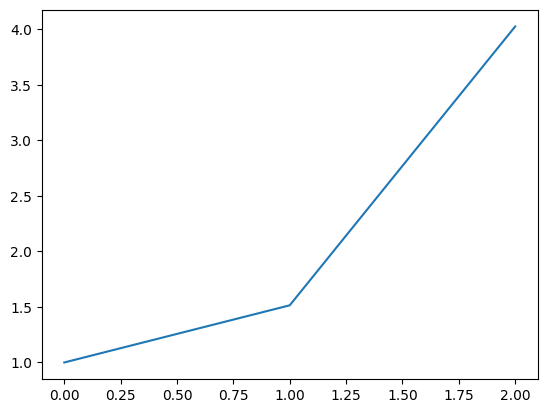

In [47]:
import matplotlib.pyplot as plt
plt.plot(nbytes / nbytes.min())


In [48]:
nbytes / nbytes.min()

array([1.        , 1.5148367 , 4.02645757])